In [9]:
import cv2
import numpy as np
import os
from tqdm import tqdm
import mtcnn
from PIL import Image
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Input
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten

In [2]:
def Crete_Folder_Images(name,dir,tn):
    # Creating directory in the file
    if not os.path.exists(dir):
        os.makedirs(dir)
    else:
        print('DIRECTORY with name %s EXIST'%name)
    detector=mtcnn.MTCNN()
    cam=cv2.VideoCapture(0)
    size =(100, 100)
    for i in tqdm(range(1, 1+ tn)):
        ret,img=cam.read()
        pixels=np.asarray(img)
        faces=detector.detect_faces(img)
        for res in faces:
            bounding_box = res['box']
            x=bounding_box[0]
            y=bounding_box[1]
            w=bounding_box[2]
            h=bounding_box[3]
            x1,y1=abs(x),abs(y)
            x2,y2=x1+w,y1+h
            face=pixels[y1:y2,x1:x2]
            image=Image.fromarray(face)
            image=image.resize(size)
            face_array=np.asarray(image)
            
            cv2.imwrite(dir+'/'+str(name)+'_'+str(i)+'.jpg',face_array)  # FOR COLOR IMAGES
            cv2.rectangle(img,(bounding_box[0], bounding_box[1]),(bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,155,255),2)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.waitKey(200)
        cv2.putText(face_array,str(i),(25,25),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow('DAtaset Creator',face_array)
        #cv2.waitKey(1)
    print('TASK COMPLETED')
    cam.release()
    cv2.destroyAllWindows()
    print('-------------------')
    
name=input("Enter name: ")
dir='images/'+name  
Crete_Folder_Images(name,dir,25)


Enter name: abn


  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 0s 188ms/step


  4%|███▎                                                                               | 1/25 [00:02<00:58,  2.42s/it]

1/1 [==============================] - 0s 31ms/step


  8%|██████▋                                                                            | 2/25 [00:03<00:40,  1.76s/it]

1/1 [==============================] - 0s 31ms/step


 12%|█████████▉                                                                         | 3/25 [00:04<00:33,  1.53s/it]

1/1 [==============================] - 0s 47ms/step


 16%|█████████████▎                                                                     | 4/25 [00:06<00:31,  1.48s/it]

1/1 [==============================] - 0s 31ms/step


 20%|████████████████▌                                                                  | 5/25 [00:07<00:29,  1.49s/it]

1/1 [==============================] - 0s 31ms/step


 24%|███████████████████▉                                                               | 6/25 [00:09<00:27,  1.46s/it]

1/1 [==============================] - 0s 25ms/step


 28%|███████████████████████▏                                                           | 7/25 [00:10<00:24,  1.38s/it]

1/1 [==============================] - 0s 23ms/step


 32%|██████████████████████████▌                                                        | 8/25 [00:11<00:22,  1.32s/it]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████████████████████▉                                                     | 9/25 [00:13<00:21,  1.34s/it]

1/1 [==============================] - 0s 20ms/step


 40%|████████████████████████████████▊                                                 | 10/25 [00:14<00:19,  1.30s/it]

1/1 [==============================] - 0s 18ms/step


 44%|████████████████████████████████████                                              | 11/25 [00:15<00:17,  1.27s/it]

1/1 [==============================] - 0s 26ms/step


 48%|███████████████████████████████████████▎                                          | 12/25 [00:16<00:16,  1.26s/it]

1/1 [==============================] - 0s 32ms/step


 52%|██████████████████████████████████████████▋                                       | 13/25 [00:17<00:14,  1.25s/it]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████████████████████████████▉                                    | 14/25 [00:19<00:13,  1.23s/it]

1/1 [==============================] - 0s 16ms/step


 60%|█████████████████████████████████████████████████▏                                | 15/25 [00:20<00:12,  1.24s/it]

1/1 [==============================] - 0s 54ms/step


 64%|████████████████████████████████████████████████████▍                             | 16/25 [00:21<00:11,  1.25s/it]

1/1 [==============================] - 0s 31ms/step


 68%|███████████████████████████████████████████████████████▊                          | 17/25 [00:22<00:09,  1.24s/it]

1/1 [==============================] - 0s 47ms/step


 72%|███████████████████████████████████████████████████████████                       | 18/25 [00:24<00:08,  1.24s/it]

1/1 [==============================] - 0s 27ms/step


 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [00:25<00:07,  1.25s/it]

1/1 [==============================] - 0s 36ms/step


 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [00:26<00:06,  1.25s/it]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [00:27<00:04,  1.24s/it]

1/1 [==============================] - 0s 32ms/step


 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [00:29<00:03,  1.23s/it]

1/1 [==============================] - 0s 21ms/step


 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [00:30<00:02,  1.23s/it]

1/1 [==============================] - 0s 31ms/step


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [00:31<00:01,  1.23s/it]

1/1 [==============================] - 0s 31ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:32<00:00,  1.31s/it]


TASK COMPLETED
-------------------


In [2]:
def print_progress(val,val_len,folder,bar_size=20):
    prog="#"*round((val)*bar_size/val_len)+" "*round((val_len-(val))*bar_size/val_len)
    if val==0:
        print("",end="\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (prog,val+1,folder), end="\r")

In [3]:
dir='download/'
names=[]
images=[]
for folder in os.listdir(dir):
    files=os.listdir(os.path.join(dir,folder))
    for i,name in enumerate(files):
        img=cv2.imread(os.path.join(dir+folder,name))
        cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        images.append(img)
        names.append(folder)
        print_progress(i,len(files),folder)


[####################] (491 samples)	 label : 10 		
[####################] (312 samples)	 label : 11 		
[####################] (442 samples)	 label : 18 		


In [12]:
print("no:of samples :",len(names))

no:of samples : 1660


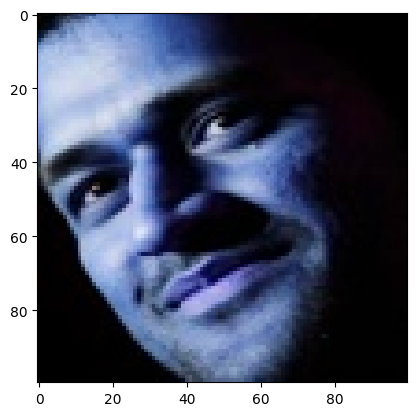

In [8]:
plt.imshow(images[10],cmap="gray")

In [4]:
le=LabelEncoder()
le.fit(names)
labels=le.classes_
name_vec=le.transform(names)
categorical_name_vec=to_categorical(name_vec)

In [5]:
print("no: classes :",len(labels))
print(labels)

no: classes : 4
['10' '11' '18' '7']


In [15]:
print(name_vec)

[0 0 0 ... 3 3 3]


In [16]:
print(categorical_name_vec)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [6]:
x_train,x_test,y_train,y_test=train_test_split(np.array(images,dtype=np.float32),np.array(categorical_name_vec),test_size=0.15,random_state=90)

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1411, 100, 100, 3) (249, 100, 100, 3) (1411, 4) (249, 4)


In [19]:
def cnn_model(input_shape):
    model=Sequential()
    
    model.add(Conv2D(64,(3,3),padding="valid",activation="relu",input_shape=input_shape))
    model.add(Conv2D(64,(3,3),padding="valid",activation="relu",input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),padding="valid",activation="relu"))
    model.add(Conv2D(128,(3,3),padding="valid",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(len(labels)))
    model.add(Activation("softmax"))
    
    model.summary()
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [20]:
x_train[0].shape

(100, 100, 3)

In [21]:
input_shape=x_train[0].shape
EPOCHS=10
BATCH_SIZE=32

model=cnn_model(input_shape)
history=model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,shuffle=True,validation_split=0.15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                    

In [22]:
import os.path
model.save('fras.h5')
model.save('/GUI/fras.h5')

In [7]:
from tensorflow.keras.models import load_model
n=load_model('fras.h5')


In [8]:
loss, accuracy = n.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

8/8 [==============================] - 4s 492ms/step - loss: 1.1305 - accuracy: 0.8514
Test: accuracy = 0.851406  ;  loss = 1.130525


In [10]:
y_pred=n.predict(x_test)

8/8 [==============================] - 5s 551ms/step


In [12]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [19]:
c_m=confusion_matrix(y_test,y_pred)
print(c_m)
TP = c_m[1,1]
FP = c_m[0,1]
FN = c_m[1,0]
TN = c_m[0,0]



[[70  0  3  5]
 [ 4 37  6  0]
 [ 1  5 54  3]
 [ 4  5  1 51]]
True Positives: 37
False Positives: 0
False Negatives: 4
True Negatives: 70


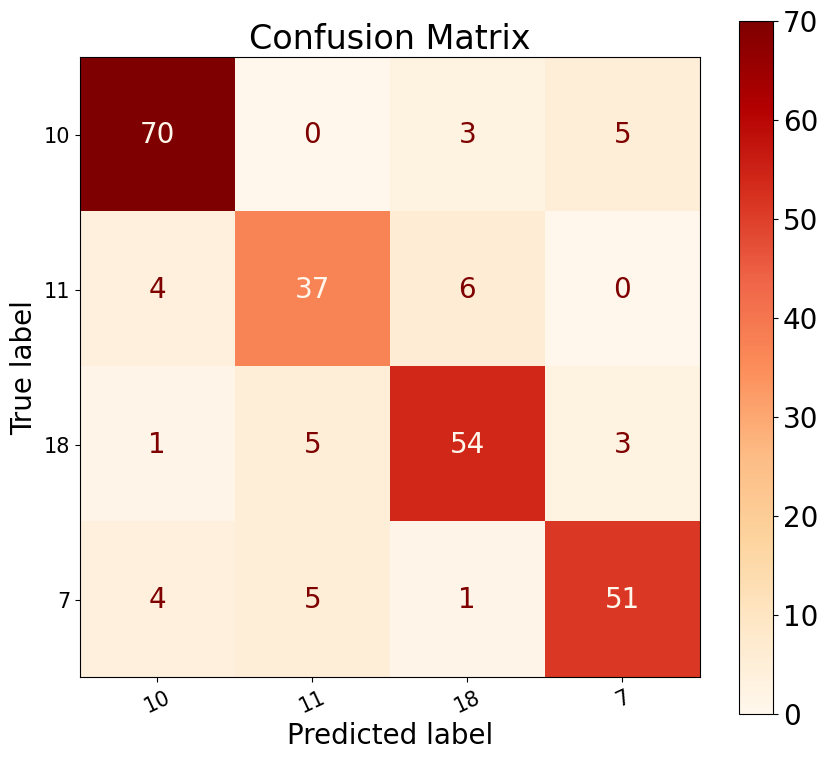

In [15]:
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        78
           1       0.79      0.79      0.79        47
           2       0.84      0.86      0.85        63
           3       0.86      0.84      0.85        61

    accuracy                           0.85       249
   macro avg       0.85      0.84      0.84       249
weighted avg       0.85      0.85      0.85       249



In [10]:
for i in range(10):
    print(i)
    r=i*10
    x_train,x_test,y_train,y_test=train_test_split(np.array(images,dtype=np.float32),np.array(categorical_name_vec),test_size=0.15,random_state=r)
    loss, accuracy = n.evaluate(x_test, y_test, verbose=1)
    print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

0
8/8 [==============================] - 4s 472ms/step - loss: 0.5226 - accuracy: 0.9518
Test: accuracy = 0.951807  ;  loss = 0.522580
1


KeyboardInterrupt: 

In [11]:
s=str(np.equal(np.argmax(y_test, axis=-1), np.argmax(y, axis=-1)).mean())
s

NameError: name 'y' is not defined

In [12]:
def evaluate_model(history):
    names=[['accuracy','val_accuracy'],['loss','val_loss']]
    for name in names:
        fig1,ax_acc=plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title("model - "+name[0])
        plt.legend(['Training','Validation'],loc='lower right')
        plt.grid()
        plt.show()

evaluate_model(history)

NameError: name 'history' is not defined

In [45]:
import mtcnn
size =(100, 100)
detector=mtcnn.MTCNN()
img=cv2.imread('testing/a.jpeg')
cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
pixels=np.asarray(img)
faces=detector.detect_faces(img)
for res in faces:            
    bounding_box = res['box']
    x=bounding_box[0]
    y=bounding_box[1]
    w=bounding_box[2]
    h=bounding_box[3]
    x1,y1=abs(x),abs(y)
    x2,y2=x1+w,y1+h
    face=pixels[y1:y2,x1:x2]
    face_img=cv2.resize(face,(100,100))
    face_img=face_img.reshape(1,100,100,3)
    





2/2 [==============================] - 0s 11ms/step


In [46]:
result=model.predict(face_img)
idx=result.argmax(axis=1)
label_text=labels[idx]
print(label_text)

1/1 [==============================] - 0s 123ms/step
['Vyshnav']


In [36]:
import mtcnn
size =(100, 100)
detector=mtcnn.MTCNN()
img=cv2.imread('testing/images.jpeg')
cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=detector.detect_faces(img)


for face in faces:            
    x, y, w, h = face['box']
    face_cropped = img[y:y+h, x:x+w]
    face_img=cv2.resize(face_cropped,(100,100))
    face_img=face_img.reshape(1,100,100,3)
    result=n.predict(face_img,verbose=0)
    idx=result.argmax(axis=1)
    label_text=labels[idx]
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0), thickness=2)
    cv2.putText(img,str(label_text),(x,y),cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),2)
cv2.imshow('Result',img)
cv2.waitKey(10000)
    
cv2.destroyAllWindows()


